In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import re

In [0]:
path = os.path.abspath('.cnn.py')

In [0]:
path = re.sub('[a-zA-Z\s._]+$', '', path) #remove unintended file

In [5]:
rock_dir = os.path.join('drive/My Drive/Google ColabData/ML Presentation 19/rps/rock')
paper_dir = os.path.join('drive/My Drive/Google ColabData/ML Presentation 19/rps/paper')
scissors_dir = os.path.join('drive/My Drive/Google ColabData/ML Presentation 19/rps/scissors')

print('Total training rock images:', len(os.listdir(rock_dir)))
print('Total training paper images:', len(os.listdir(paper_dir)))
print('Total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

Total training rock images: 840
Total training paper images: 840
Total training scissors images: 840
['rock01-002.png', 'rock01-003.png', 'rock01-000.png', 'rock01-004.png', 'rock01-006.png', 'rock01-001.png', 'rock01-005.png', 'rock01-008.png', 'rock01-009.png', 'rock01-007.png']
['paper01-002.png', 'paper01-003.png', 'paper01-004.png', 'paper01-000.png', 'paper01-001.png', 'paper01-005.png', 'paper01-006.png', 'paper01-015.png', 'paper01-008.png', 'paper01-014.png']
['scissors01-000.png', 'scissors01-009.png', 'scissors01-003.png', 'scissors01-006.png', 'scissors01-005.png', 'scissors01-001.png', 'scissors01-002.png', 'scissors01-010.png', 'scissors01-004.png', 'scissors01-008.png']


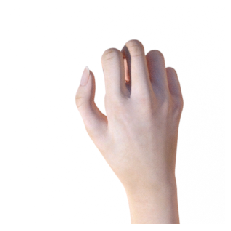

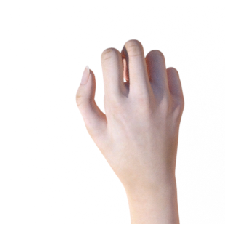

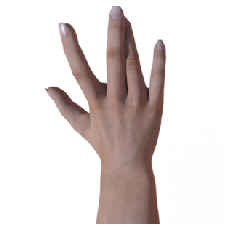

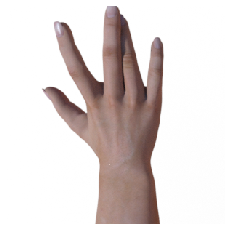

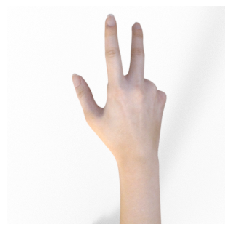

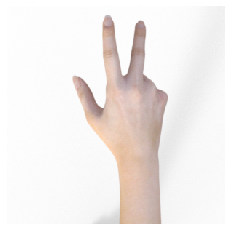

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [7]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "drive/My Drive/Google ColabData/ML Presentation 19/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "drive/My Drive/Google ColabData/ML Presentation 19/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPool

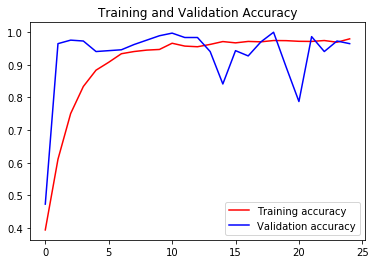

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()


In [12]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # Testing new images using trained model
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes) # note that in the solution vector - 0 stands for paper ; 1 stands for rock ; 2 stands for scissors , in alphabetical way.
  #print(classes[0][1])
  if classes[0][0]==1.0 :
    print("That's a paper !\n")
  elif classes[0][1]==1.0 :
    print("That's a rock !\n")
  elif classes[0][2]==1.0 :
    print("That's a scissors !\n")

Saving testpaper04-04.png to testpaper04-04 (1).png
Saving testscissors04-12.png to testscissors04-12 (1).png
Saving testscissors03-25.png to testscissors03-25 (1).png
Saving testrock03-00.png to testrock03-00 (1).png
Saving testpaper03-19.png to testpaper03-19 (1).png
Saving testrock01-07.png to testrock01-07 (1).png
Saving testrock02-02.png to testrock02-02 (1).png
testpaper04-04.png
[[1. 0. 0.]]
That's a paper !

testscissors04-12.png
[[0. 0. 1.]]
That's a scissors !

testscissors03-25.png
[[0. 0. 1.]]
That's a scissors !

testrock03-00.png
[[0. 1. 0.]]
That's a rock !

testpaper03-19.png
[[1. 0. 0.]]
That's a paper !

testrock01-07.png
[[0. 1. 0.]]
That's a rock !

testrock02-02.png
[[0. 1. 0.]]
That's a rock !

